# Webscraping from CDC COVID-19 Site and Creating Plot
- Patty Jula, <pattyjula@gmail.com>

The CDC has been providing daily counts of the number of cases and deaths in the United States from COVID-19. This script provides plots of the CDC COVID19 case and death counts. 

Source: <http://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html>
## Note:
This type of webscraping is only available from sites that reveal their source code. The best practice is to ask permission before scraping so an organization's servers are not overloaded.

In [12]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import matplotlib.ticker as mtick
pd.plotting.register_matplotlib_converters()

In [13]:
# Set way to provide uppermost limit for plots
roundup_next_pow_10 = lambda x: 10**(
    int(np.log(x)/np.log(10)) + 1)

## Read in CSV of cases and deaths, format fields, and create a dataframe

In [14]:
df = pd.read_csv("storage.csv", parse_dates=['Date'])
df.set_index('Date')
# prevent time from displaying
df['Date'] = pd.to_datetime(df['Date']).dt.date 
df['count'] = df['count'].str.replace(',', '').astype(int)
df.head()

,Date,count,type
0,2020-03-27,85356,Total cases
1,2020-03-27,1246,Total deaths
2,2020-03-31,163539,Total cases
3,2020-03-31,2860,Total deaths
4,2020-04-01,186101,Total cases


# Create bar plot with seaborn

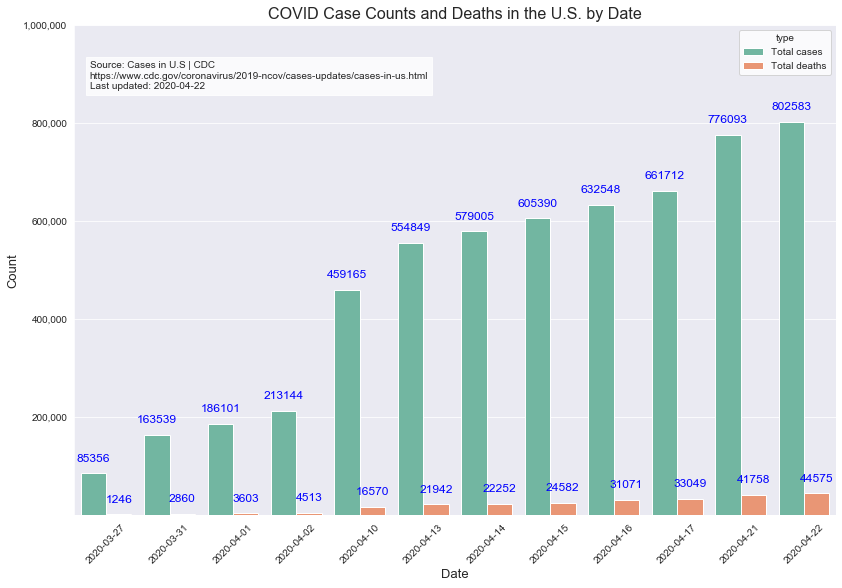

In [18]:
#sns.set(style="whitegrid")
sns.set_style('darkgrid')
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 11.7,8.27
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

# bar lot
ax = sns.barplot(x="Date", y="count", hue= 'type', data=df, palette ="Set2")#, color= 'Set2')


for p in ax.patches:
    #y = int("count")
    txt = "{:,}"
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='center', fontsize=12, color='blue', xytext=(0, 15),
        textcoords='offset points')
sns.color_palette("Set2")
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)
plt.title("COVID Case Counts and Deaths in the U.S. by Date", size = 16)
plt.xlabel("Date", size = 13)
plt.ylabel("Count", size = 13)
plt.tight_layout()
#x.set(ylim=(10, 2500000))
plt.ylim(1, roundup_next_pow_10(max(df["count"])))
#plt.yscale('log')
source_txt = """Source: Cases in U.S | CDC
https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html
Last updated: """
last_date = df["Date"].max()
source_txt += last_date.strftime("%Y-%m-%d")
plt.figtext(0.02, 0.87, source_txt,transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8))
, horizontalalignment='right') 
plt.savefig('data.png', dpi=600) 
plt.show()

In [16]:
## Create Line Plot

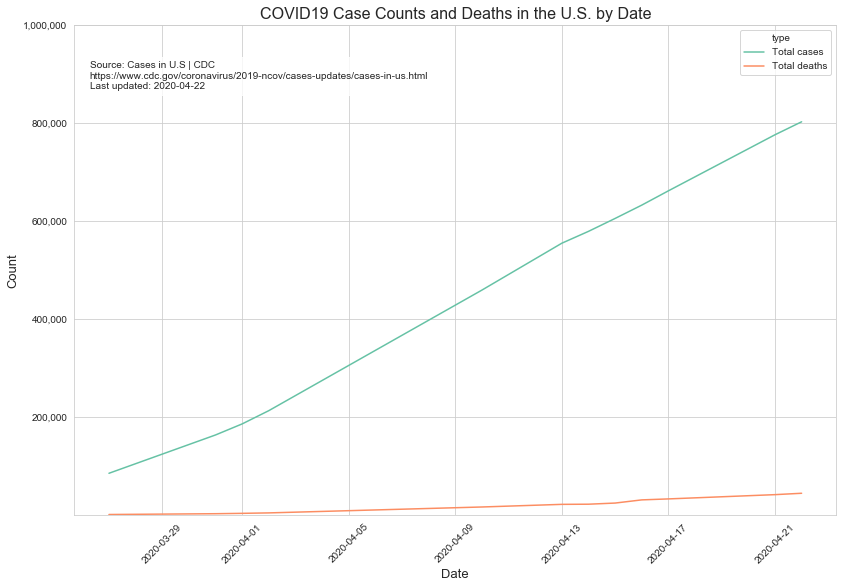

In [21]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 11.7,8.27
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
ax = sns.lineplot(x="Date", y="count", hue= 'type', data=df, palette ="Set2")#, color= 'Set2')
sns.color_palette("Set1")
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)
plt.title("COVID19 Case Counts and Deaths in the U.S. by Date", size = 16)
plt.xlabel("Date", size = 13)
plt.ylabel("Count", size = 13)
plt.tight_layout()
#x.set(ylim=(10, 2500000))
plt.ylim(1, roundup_next_pow_10(max(df["count"])))
#plt.yscale('log')
source_txt = """Source: Cases in U.S | CDC
https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html
Last updated: """
last_date = df["Date"].max()
source_txt += last_date.strftime("%Y-%m-%d")
plt.figtext(0.02, 0.87, source_txt,transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8))
, horizontalalignment='right') 
plt.savefig('CDCdataLine.png', dpi=600) 
plt.show()